In [11]:
import autolens as al
import autolens.plot as aplt

from astropy import cosmology

# Import CMasher to register colormaps
import cmasher as cmr
cmap = cmr.pride

To begin, lets setup the _Grid_'s we 'll ray-trace using. Lets do something crazy, and use a higher resolution _Grid_ 
then before and set the sub _Grid_ size to 4x4 per pixel!

Every pixel is sub-gridded by 4x4, so the sub-grid has x16 more coordinates.

Lets also stop calling it the 'image_plane_grid', and just remember from now on our 'grid' is in the image-plane.

In [4]:
grid = al.Grid.uniform(shape_2d=(200, 200), pixel_scales=0.025, sub_size=4)

In [72]:
lens_galaxy_no_shear = al.Galaxy(
    redshift=0.5,
    mass=al.mp.SphericalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6
    ),
)

lens_galaxy_shear = al.Galaxy(
    redshift=0.5,
    mass=al.mp.SphericalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6
    ),
    shear=al.mp.ExternalShear(elliptical_comps=(0.15, 0.0)),
)

In [80]:
print("Shear Magnitude and Angle")
al.convert.shear_magnitude_and_phi_from((0.15, 0.0))

Shear Magnitude and Angle


(0.15, 45.0)

In [81]:
source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.SphericalDevVaucouleurs(
        centre=(0.1, 0.2), intensity=0.3, effective_radius=0.3
    ),
    disk=al.lp.EllipticalExponential(
        centre=(0.1, 0.2),
        elliptical_comps=(0.111111, 0.0),
        intensity=3.0,
        effective_radius=1.0,
    ),
)

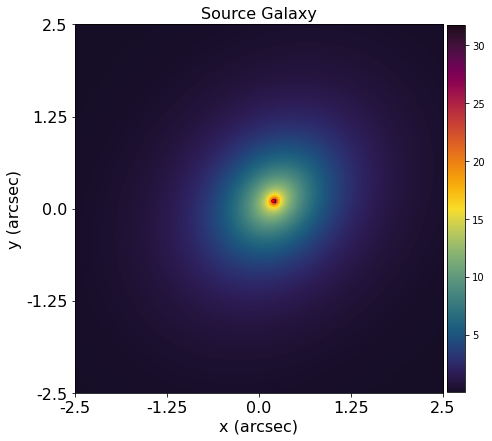

In [82]:
aplt.Galaxy.image(
    galaxy=source_galaxy,
    grid=grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source Galaxy"), cmap=aplt.ColorMap(cmap=cmap)),
)



In [83]:
tracer_no_shear = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy_no_shear, source_galaxy],
    cosmology=cosmology.Planck15,
)

tracer_shear = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy_shear, source_galaxy],
    cosmology=cosmology.Planck15,
)

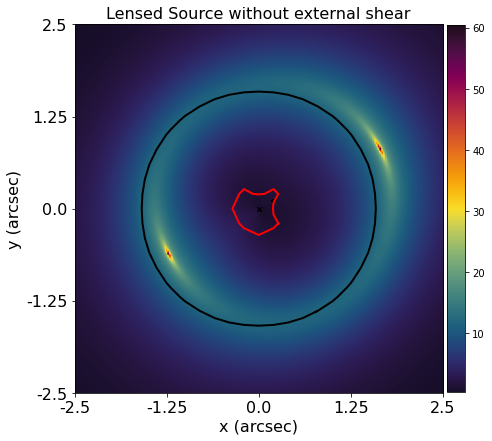

In [88]:
aplt.Tracer.image(tracer=tracer_no_shear, grid=grid,
                 plotter=aplt.Plotter(labels=aplt.Labels(title="Lensed Source without external shear"), cmap=aplt.ColorMap(cmap=cmap)))

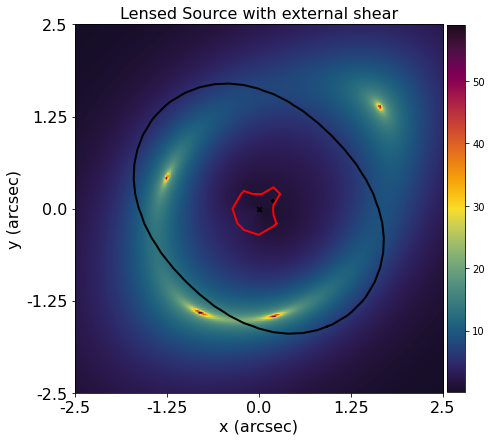

In [85]:
aplt.Tracer.image(tracer=tracer_shear, grid=grid,include=aplt.Include()
                 plotter=aplt.Plotter(labels=aplt.Labels(title="Lensed Source with external shear"), cb=aplt.ColorBar(None), cmap=aplt.ColorMap(cmap=cmap)))